# Regression-Based Classification Figures

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5),
             'figure.dpi': 160})
# sns.set_style('white')

In [2]:
df = pd.read_pickle('C:/Users/johnj/Documents/Data/aml in econ 02 spring 2021/class data/class_data.pkl')

In [3]:
df.corr()

,pct_d_rgdp,pos_net_jobs,emp_estabs,estabs_entry_rate,estabs_exit_rate,pop,pop_pct_black,pop_pct_hisp,lfpr,density,year
pct_d_rgdp,1.000000,0.094082,-0.023892,0.107203,-0.019335,-0.001090,-0.047817,0.042399,0.087631,-0.002250,-0.054935
pos_net_jobs,0.094082,1.000000,0.082090,0.168129,-0.140994,0.059889,-0.032562,0.062623,0.044424,0.029184,0.074474
emp_estabs,-0.023892,0.082090,1.000000,-0.096485,-0.121413,0.262794,0.208449,0.043315,-0.106305,0.144243,0.039036
estabs_entry_rate,0.107203,0.168129,-0.096485,1.000000,0.374193,0.115174,-0.037122,0.088842,0.016085,0.057021,-0.332446
estabs_exit_rate,-0.019335,-0.140994,-0.121413,0.374193,1.000000,0.084288,-0.026012,0.056535,-0.037925,0.047386,-0.292033
pop,-0.001090,0.059889,0.262794,0.115174,0.084288,1.000000,0.090121,0.194192,-0.007622,0.338333,0.013769
pop_pct_black,-0.047817,-0.032562,0.208449,-0.037122,-0.026012,0.090121,1.000000,-0.089800,-0.419829,0.106322,0.017039
pop_pct_hisp,0.042399,0.062623,0.043315,0.088842,0.056535,0.194192,-0.089800,1.000000,-0.042294,0.084167,0.066816
lfpr,0.087631,0.044424,-0.106305,0.016085,-0.037925,-0.007622,-0.419829,-0.042294,1.000000,-0.012952,-0.047852
density,-0.002250,0.029184,0.144243,0.057021,0.047386,0.338333,0.106322,0.084167,-0.012952,1.000000,0.005043


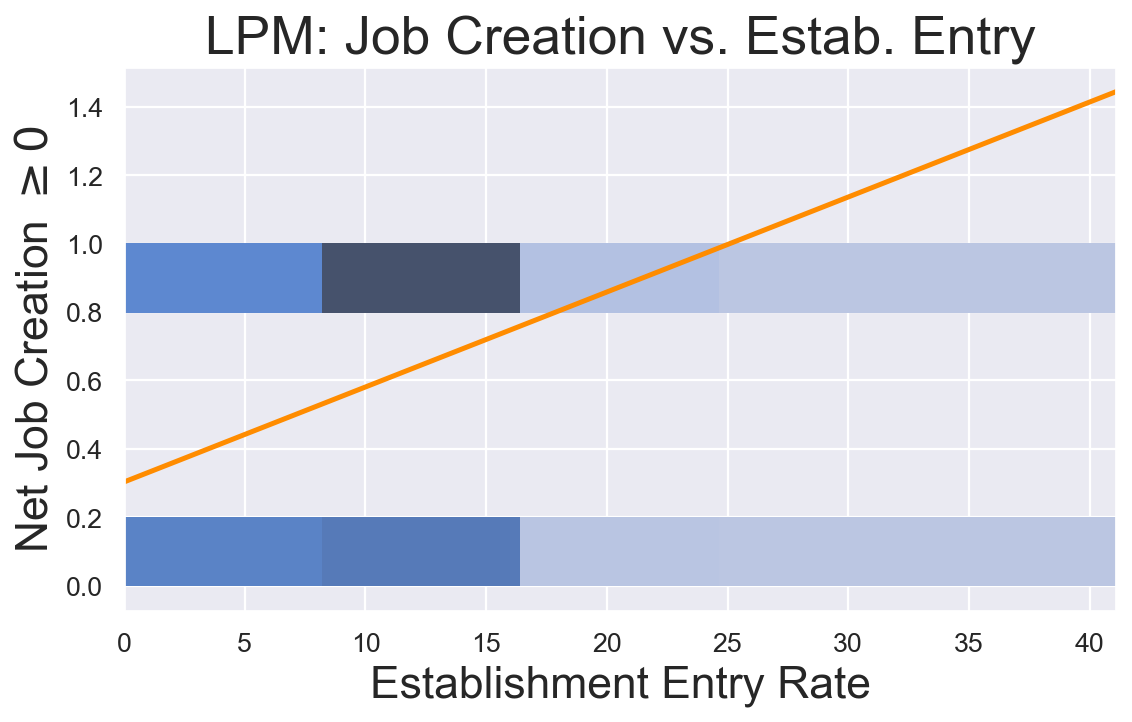

In [4]:
sns.histplot(data = df[df.estabs_entry_rate < 50],
             x = 'estabs_entry_rate',
             y = 'pos_net_jobs',
             bins = 5)
sns.regplot(data = df[df.estabs_entry_rate < 50],
            x = 'estabs_entry_rate',
            y = 'pos_net_jobs',
            scatter = False,
            ci = None,
            color = 'darkorange')

plt.ylabel('Net Job Creation $\geq0$')
plt.xlabel('Establishment Entry Rate')
plt.title('LPM: Job Creation vs. Estab. Entry')

plt.savefig('LPM')

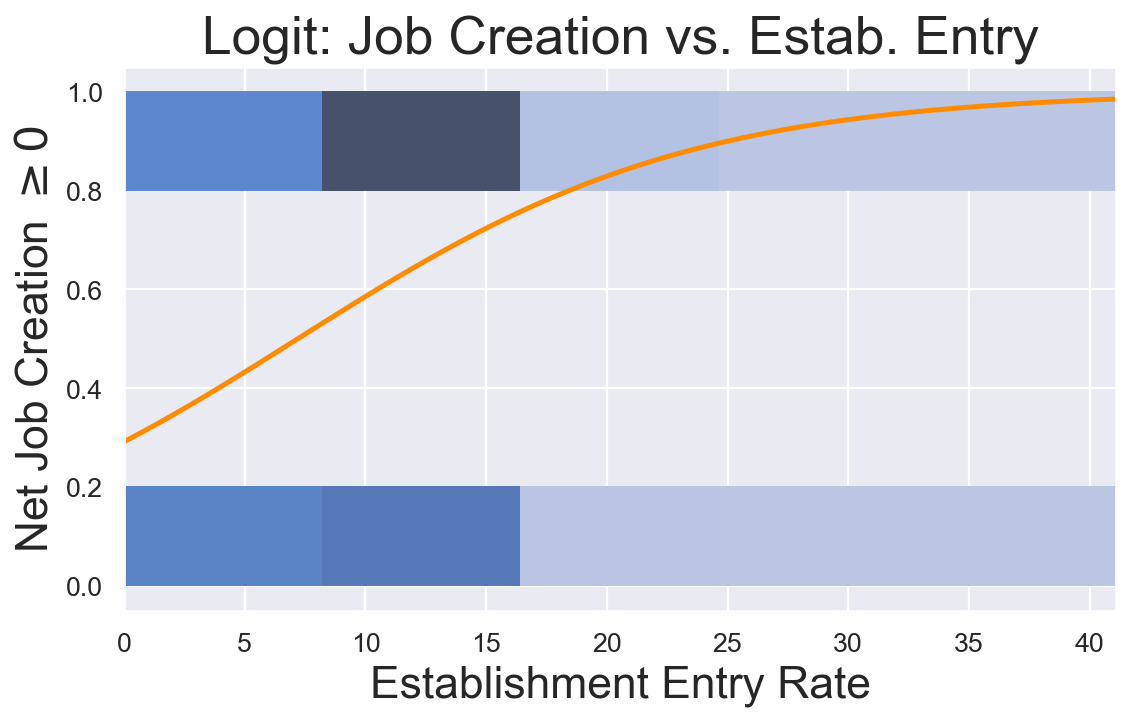

In [5]:
sns.histplot(data = df[df.estabs_entry_rate < 50],
             x = 'estabs_entry_rate',
             y = 'pos_net_jobs',
             bins = 5)
sns.regplot(data = df[df.estabs_entry_rate < 50],
            x = 'estabs_entry_rate',
            y = 'pos_net_jobs',
            scatter = False,
            ci = None,
            color = 'darkorange',
            logistic = True)

plt.ylabel('Net Job Creation $\geq0$')
plt.xlabel('Establishment Entry Rate')
plt.title('Logit: Job Creation vs. Estab. Entry')

plt.savefig('Logit')

In [6]:
fit = smf.logit(data = df[df.estabs_entry_rate < 50],
                formula = 'pos_net_jobs ~ estabs_entry_rate').fit()
fit.params

Optimization terminated successfully.
         Current function value: 0.670543
         Iterations 5


Intercept           -0.887324
estabs_entry_rate    0.123264
dtype: float64

$$\begin{align}
    log\left(\frac{y}{1-y}\right) & = \beta_0 + x\beta_1\\
    \frac{log\left(\frac{y}{1-y}\right) - \beta_0}{\beta_1} & = x
\end{align}$$

In [7]:
def logit_x(y, params):
    return (  np.log(y/(1-y)) - params[0]  )/params[1]

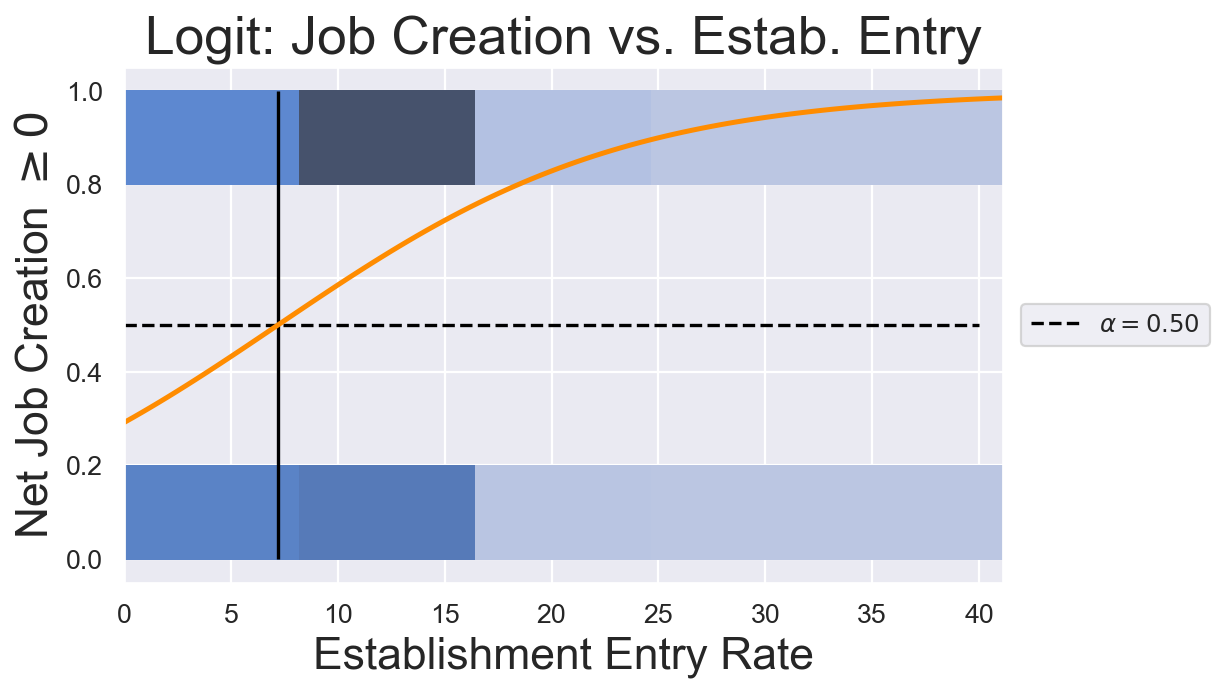

In [8]:
y_int = 0.5
y_min = 0
y_max = 1

x_int = logit_x(y_int, fit.params)
x_min = 0
x_max = 40

sns.histplot(data = df[df.estabs_entry_rate < 50],
             x = 'estabs_entry_rate',
             y = 'pos_net_jobs',
             bins = 5)
sns.regplot(data = df[df.estabs_entry_rate < 50],
            x = 'estabs_entry_rate',
            y = 'pos_net_jobs',
            scatter = False,
            ci = None,
            color = 'darkorange',
            logistic = True)

plt.vlines(x = x_int, ymin = y_min, ymax = y_max,
           color = 'black')#, linestyles = 'dashed')
plt.hlines(xmin = x_min, xmax = x_max, y = y_int,
           color = 'black', linestyles = 'dashed',
           label = '$\\alpha={0:.2f}$'.format(y_int))

plt.ylabel('Net Job Creation $\geq0$')
plt.xlabel('Establishment Entry Rate')
plt.title('Logit: Job Creation vs. Estab. Entry')
plt.legend(bbox_to_anchor = (1.25, y_int), loc = 'right')
plt.tight_layout()

plt.savefig('alpha {0:.0f}'.format(100*y_int))

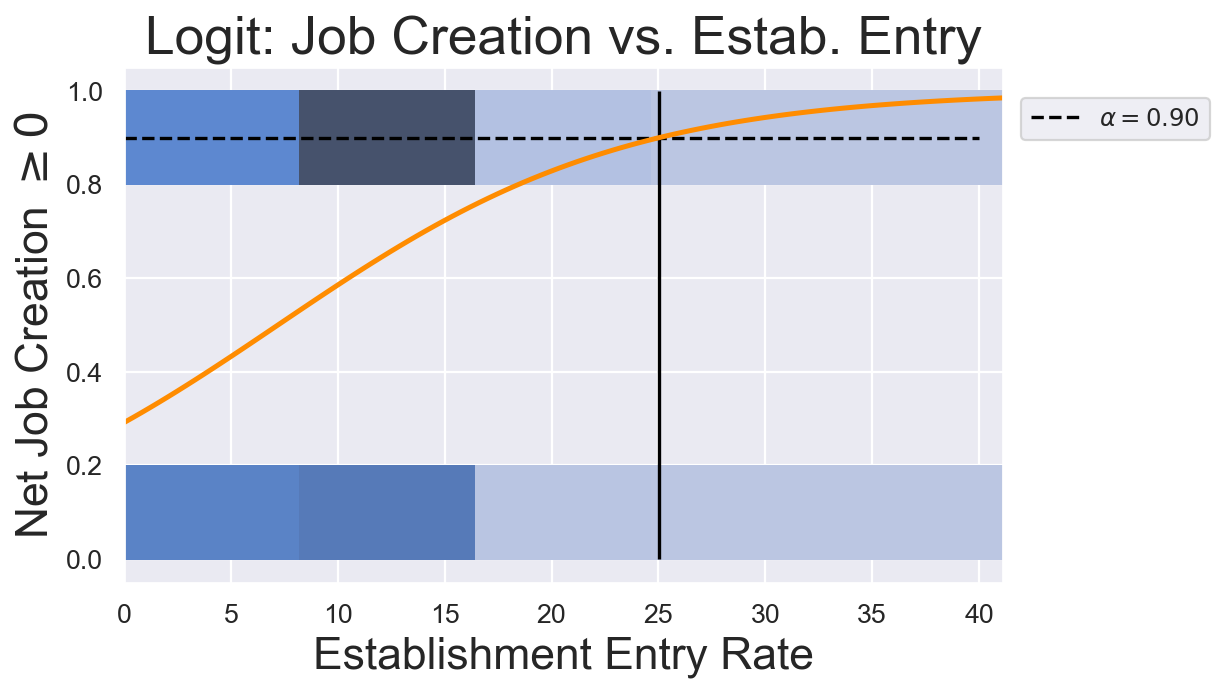

In [9]:
y_int = 0.90
x_int = logit_x(y_int, fit.params)

sns.histplot(data = df[df.estabs_entry_rate < 50],
             x = 'estabs_entry_rate',
             y = 'pos_net_jobs',
             bins = 5)
sns.regplot(data = df[df.estabs_entry_rate < 50],
            x = 'estabs_entry_rate',
            y = 'pos_net_jobs',
            scatter = False,
            ci = None,
            color = 'darkorange',
            logistic = True)

plt.vlines(x = x_int, ymin = y_min, ymax = y_max,
           color = 'black')#, linestyles = 'dashed')
plt.hlines(xmin = x_min, xmax = x_max, y = y_int,
           color = 'black', linestyles = 'dashed',
           label = '$\\alpha={0:.2f}$'.format(y_int))

plt.ylabel('Net Job Creation $\geq0$')
plt.xlabel('Establishment Entry Rate')
plt.title('Logit: Job Creation vs. Estab. Entry')
plt.legend(bbox_to_anchor = (1.25, y_int), loc = 'right')
plt.tight_layout()

plt.savefig('alpha {0:.0f}'.format(100*y_int))

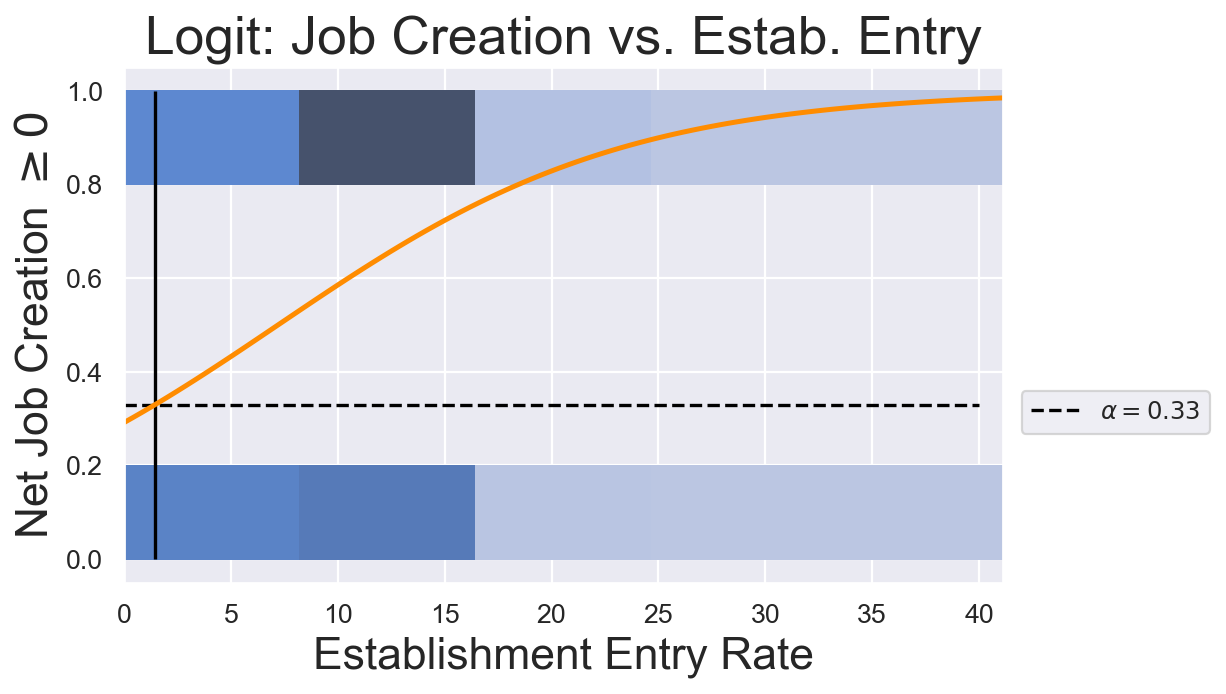

In [10]:
y_int = 0.33
x_int = logit_x(y_int, fit.params)

sns.histplot(data = df[df.estabs_entry_rate < 50],
             x = 'estabs_entry_rate',
             y = 'pos_net_jobs',
             bins = 5)
sns.regplot(data = df[df.estabs_entry_rate < 50],
            x = 'estabs_entry_rate',
            y = 'pos_net_jobs',
            scatter = False,
            ci = None,
            color = 'darkorange',
            logistic = True)

plt.vlines(x = x_int, ymin = y_min, ymax = y_max,
           color = 'black')#, linestyles = 'dashed')
plt.hlines(xmin = x_min, xmax = x_max, y = y_int,
           color = 'black', linestyles = 'dashed',
           label = '$\\alpha={0:.2f}$'.format(y_int))

plt.ylabel('Net Job Creation $\geq0$')
plt.xlabel('Establishment Entry Rate')
plt.title('Logit: Job Creation vs. Estab. Entry')
plt.legend(bbox_to_anchor = (1.25, y_int), loc = 'right')
plt.tight_layout()

plt.savefig('alpha {0:.0f}'.format(100*y_int))